In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import precision_score,recall_score, f1_score
from flask import Flask, request, jsonify
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


Individual project,  
Name: Hongyu

Project Description: This project uses three different machine learning algorithms to explore past credit and loan information of PayPal's cooperation platform. In the financial business scenario, the lending business uses machine learning algorithms to build models for digital transformation business. Through the analysis and processing of 800,000 pieces of data of the lending information platform, it is hoped to optimize adjust, and find an algorithm with optimal effect to solve the bottleneck of Digital Transformation encountered by the industry and improve efficiency and accuracy by using the digital system.

The Description of columns name:

id: order number,  
loanAmnt:  Total amount,  
interestRate: Interest ratio ,  
installment: Installment ,  
grade: Risk ,  
subGrade: Sub-level ,  
employmetTitle: Occupation title ,  
annualIncome: Annual income ,  
isDefault: Default background ,  
purpose: indicates the purpose of the loan,  
dti: Debt-to-income ratio ,  
ficoRangeHigh: Penalty amount (high) ,  
openAcc: Open account,  
revolBar: reversal threshold ,  
totalAcc: total account number ,  
earliesCrediyLine: low interest rate credit line,  
title: title ,  
policyCode: policy code,  

In [2]:
data = pd.read_csv("./data.csv")
data

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,annualIncome,isDefault,purpose,dti,ficoRangeLow,openAcc,revolBal,totalAcc,earliesCreditLine,title,policyCode
0,0,42000,5,21.674228,927.134668,E,E2,320.0,111000.0,1,1,12.561763,728,8,24179,28,1-Aug,1.0,1
1,1,23000,5,15.036774,502.313142,D,D2,219843.0,52000.0,0,0,28.313509,699,14,15101,20,2-May,1723.0,1
2,2,18000,5,17.850663,273.198985,D,D3,31698.0,77000.0,0,0,24.416141,673,12,4610,29,6-May,0.0,1
3,3,12000,3,7.400815,318.462279,A,A4,46854.0,119000.0,0,4,19.105931,682,10,9955,30,May-99,4.0,1
4,4,5000,3,15.688492,94.662335,C,C2,54.0,35000.0,0,10,34.280791,689,13,2944,29,Aug-77,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,799995,26000,3,14.634214,1000.861120,C,C4,2659.0,76000.0,0,0,23.089648,708,15,9938,16,11-Aug,0.0,1
799996,799996,22000,3,7.103320,535.070316,A,A4,29205.0,102000.0,0,4,15.541106,717,8,20478,45,May-89,33369.0,1
799997,799997,9000,3,12.471062,191.330483,C,C3,2582.0,67000.0,1,0,11.602060,668,6,6382,39,2-Jul,0.0,1
799998,799998,21000,3,6.091765,568.563764,A,A4,151.0,98000.0,0,4,30.317779,673,17,69707,38,Jan-94,4.0,1


This step is to check for missing data.

In [3]:
data.isnull().sum()

id                     0
loanAmnt               0
term                   0
interestRate           0
installment            0
grade                  0
subGrade               0
employmentTitle        1
annualIncome           0
isDefault              0
purpose                0
dti                  239
ficoRangeLow           0
openAcc                0
revolBal               0
totalAcc               0
earliesCreditLine      0
title                  1
policyCode             0
dtype: int64

In [4]:
#Fill missing values with the median
def refill(column):
    return column.fillna(column.median(), inplace = True)

In [5]:
refill(data['employmentTitle'])
refill(data['dti'])
refill(data['title'])

Check if there are still missing values.

In [6]:
data.isnull().sum()

id                   0
loanAmnt             0
term                 0
interestRate         0
installment          0
grade                0
subGrade             0
employmentTitle      0
annualIncome         0
isDefault            0
purpose              0
dti                  0
ficoRangeLow         0
openAcc              0
revolBal             0
totalAcc             0
earliesCreditLine    0
title                0
policyCode           0
dtype: int64

In [7]:
data.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,annualIncome,isDefault,purpose,dti,ficoRangeLow,openAcc,revolBal,totalAcc,title,policyCode
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.0
mean,399999.500000,18248.716250,3.482745,13.238471,437.950502,72005.271401,8.012840e+04,0.199513,1.745982,18.287324,694.203934,12.598020,1.623271e+04,26.999851,1754.111398,1.0
std,230940.252013,8985.792531,0.855832,4.970289,266.346845,106585.597794,6.897560e+04,0.399634,2.367453,11.287893,31.875816,5.475286,2.245802e+04,12.027350,7941.469319,0.0
min,0.000000,1000.000000,3.000000,2.682407,15.710612,0.000000,1.000000e+03,0.000000,0.000000,-0.977029,629.000000,1.000000,1.000000e+00,3.000000,0.000000,1.0
25%,199999.750000,11000.000000,3.000000,9.538643,243.933920,427.000000,5.000000e+04,0.000000,0.000000,11.638924,669.000000,9.000000,5.948000e+03,18.000000,0.000000,1.0
50%,399999.500000,17000.000000,3.000000,12.670908,374.527621,7755.000000,6.855900e+04,0.000000,0.000000,17.476714,687.000000,12.000000,1.113600e+04,25.000000,1.000000,1.0
75%,599999.250000,24000.000000,3.000000,16.083954,578.828842,117663.250000,9.500000e+04,0.000000,4.000000,24.023989,709.000000,15.000000,1.973800e+04,34.000000,5.000000,1.0
max,799999.000000,47000.000000,5.000000,41.049813,1917.864031,378351.000000,1.100420e+07,1.000000,13.000000,1197.834723,844.000000,87.000000,2.904842e+06,165.000000,61680.000000,1.0


From the above table, we can see that there are outliers in the columns with large differences between the maximum value and the mean value or large differences between the distribution of most data. I think there's an outlier in the "interestRate", "dti" column.

Next, we use data visualization to observe the outliers in each column of data.

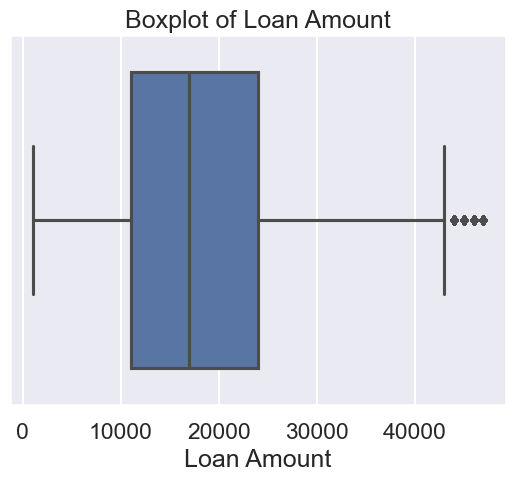

In [8]:
sns.boxplot(x=data['loanAmnt'])
plt.xlabel('Loan Amount')
plt.title('Boxplot of Loan Amount')
plt.show()

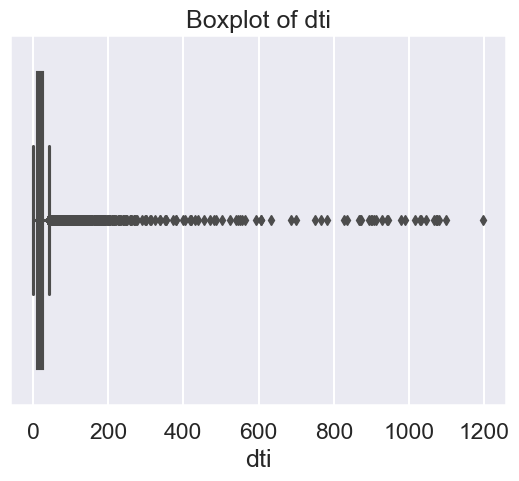

In [9]:
sns.boxplot(x=data['dti'])
plt.xlabel('dti')
plt.title('Boxplot of dti')
plt.show()

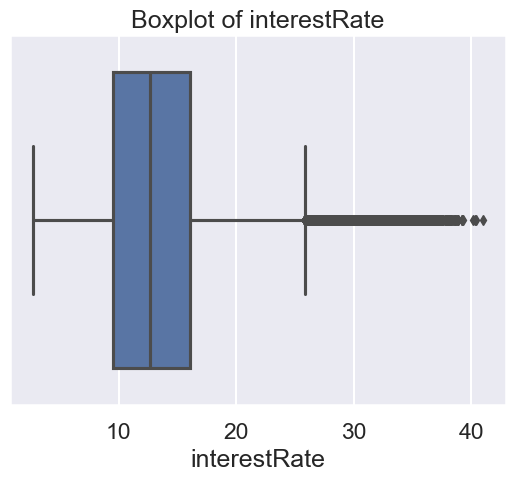

In [10]:
sns.boxplot(x=data['interestRate'])
plt.xlabel('interestRate')
plt.title('Boxplot of interestRate')
plt.show()

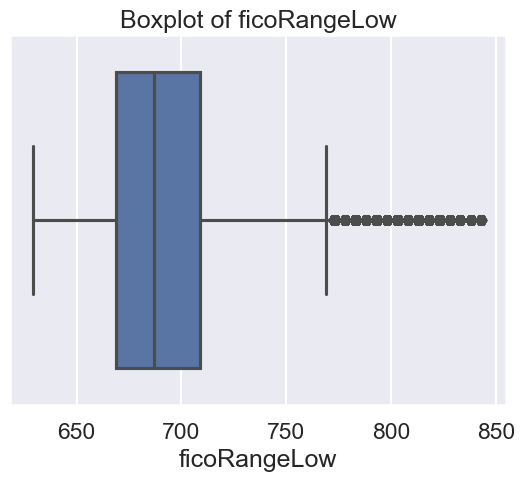

In [11]:
sns.boxplot(x=data['ficoRangeLow'])
plt.xlabel('ficoRangeLow')
plt.title('Boxplot of ficoRangeLow')
plt.show()

Through the boxplot, it can be found that there are outliers in the columns of "interestRate "," dti", "loanAmnt", and "ficoRangeLow ".

Changes the numeric type of a column to a floating-point type.

In [12]:
data["loanAmnt"] = data["loanAmnt"].astype(float)
data["interestRate"] = data["interestRate"].astype(float)
data["installment"] = data["installment"].astype(float)
data["annualIncome"] = data["annualIncome"].astype(float)
data["dti"] = data["dti"].astype(float)



Turns the numeric type of a column into an integer.

In [13]:
data["isDefault"] = data["isDefault"].astype(int)
data["ficoRangeLow"] = data["ficoRangeLow"].astype(int)
data["term"] = data["term"].astype(int)
data["policyCode"] = data["policyCode"].astype(int)
data["openAcc"] = data["openAcc"].astype(int)
data["revolBal"] = data["revolBal"].astype(int)


In [14]:
data["title"] = data["title"].astype(str)
data["purpose"] = data["purpose"].astype(str)
data["employmentTitle"] = data["employmentTitle"].astype(str)

In [15]:
def checktype(column):
    answer = []
    for i in data.get(column):
        if type(i) != int:
            answer.append(i)
    return answer
            

In [16]:
data


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,annualIncome,isDefault,purpose,dti,ficoRangeLow,openAcc,revolBal,totalAcc,earliesCreditLine,title,policyCode
0,0,42000.0,5,21.674228,927.134668,E,E2,320.0,111000.0,1,1,12.561763,728,8,24179,28,1-Aug,1.0,1
1,1,23000.0,5,15.036774,502.313142,D,D2,219843.0,52000.0,0,0,28.313509,699,14,15101,20,2-May,1723.0,1
2,2,18000.0,5,17.850663,273.198985,D,D3,31698.0,77000.0,0,0,24.416141,673,12,4610,29,6-May,0.0,1
3,3,12000.0,3,7.400815,318.462279,A,A4,46854.0,119000.0,0,4,19.105931,682,10,9955,30,May-99,4.0,1
4,4,5000.0,3,15.688492,94.662335,C,C2,54.0,35000.0,0,10,34.280791,689,13,2944,29,Aug-77,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,799995,26000.0,3,14.634214,1000.861120,C,C4,2659.0,76000.0,0,0,23.089648,708,15,9938,16,11-Aug,0.0,1
799996,799996,22000.0,3,7.103320,535.070316,A,A4,29205.0,102000.0,0,4,15.541106,717,8,20478,45,May-89,33369.0,1
799997,799997,9000.0,3,12.471062,191.330483,C,C3,2582.0,67000.0,1,0,11.602060,668,6,6382,39,2-Jul,0.0,1
799998,799998,21000.0,3,6.091765,568.563764,A,A4,151.0,98000.0,0,4,30.317779,673,17,69707,38,Jan-94,4.0,1


The number of unique values for each column can be obtained with the following code.

In [17]:
data_unique = data.nunique()
data_unique

id                   800000
loanAmnt                 47
term                      2
interestRate         799864
installment          799954
grade                     7
subGrade                 35
employmentTitle      248683
annualIncome          48493
isDefault                 2
purpose                  14
dti                  799171
ficoRangeLow            115
openAcc                  75
revolBal              71161
totalAcc                138
earliesCreditLine       720
title                 39644
policyCode                1
dtype: int64

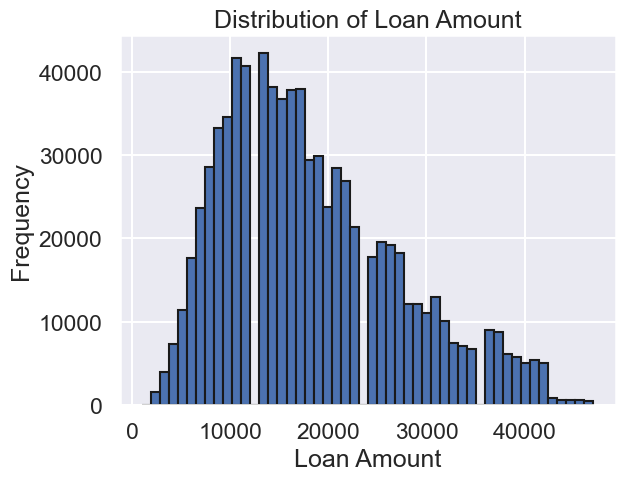

In [18]:
plt.hist(data['loanAmnt'], bins=50, edgecolor='k')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

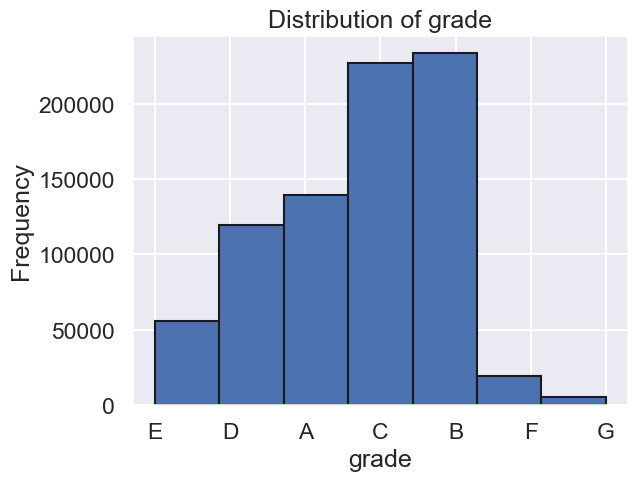

In [19]:
plt.hist(data['grade'], bins=7, edgecolor='k')
plt.xlabel('grade')
plt.ylabel('Frequency')
plt.title('Distribution of grade')
plt.show()

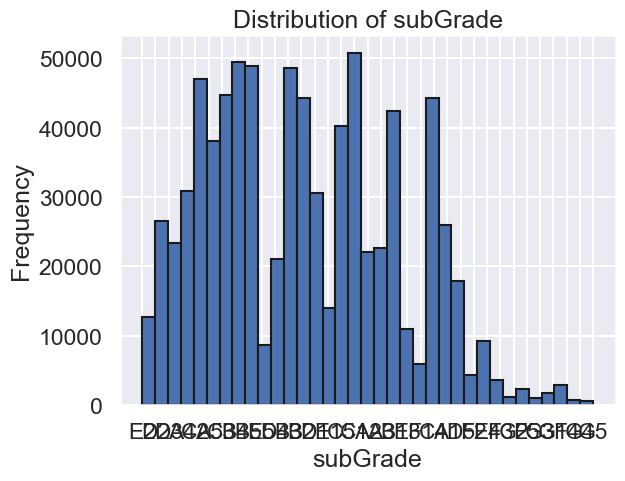

In [20]:
plt.hist(data['subGrade'], bins=35, edgecolor='k')
plt.xlabel('subGrade')
plt.ylabel('Frequency')
plt.title('Distribution of subGrade')
plt.show()

The next step is to see if the columns with more than two unique values are high-dimensional and sparse. The following function can be used to look at the type of each column, so as to determine whether the column is high-dimensional and sparse.

In [21]:
def check(column):
    c=data.groupby(column).count()
    return c

By analyzing "earliesCreditLine" and "subGrade", the number of types of these two columns is greater than 2, they are not high-dimensional sparse, and they are pure classification features, so we can delete these two columns. In addition, you can also remove the "policyCode" and "id" columns, because there is only one value in the "policyCode" column, which I think is not very helpful for later analysis, and the "id" column is the same as the index, so it is not helpful for later analysis.

In [22]:
new_data = data.drop(columns=["earliesCreditLine", "subGrade", "policyCode","id"])
new_data

,loanAmnt,term,interestRate,installment,grade,employmentTitle,annualIncome,isDefault,purpose,dti,ficoRangeLow,openAcc,revolBal,totalAcc,title
0,42000.0,5,21.674228,927.134668,E,320.0,111000.0,1,1,12.561763,728,8,24179,28,1.0
1,23000.0,5,15.036774,502.313142,D,219843.0,52000.0,0,0,28.313509,699,14,15101,20,1723.0
2,18000.0,5,17.850663,273.198985,D,31698.0,77000.0,0,0,24.416141,673,12,4610,29,0.0
3,12000.0,3,7.400815,318.462279,A,46854.0,119000.0,0,4,19.105931,682,10,9955,30,4.0
4,5000.0,3,15.688492,94.662335,C,54.0,35000.0,0,10,34.280791,689,13,2944,29,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,26000.0,3,14.634214,1000.861120,C,2659.0,76000.0,0,0,23.089648,708,15,9938,16,0.0
799996,22000.0,3,7.103320,535.070316,A,29205.0,102000.0,0,4,15.541106,717,8,20478,45,33369.0
799997,9000.0,3,12.471062,191.330483,C,2582.0,67000.0,1,0,11.602060,668,6,6382,39,0.0
799998,21000.0,3,6.091765,568.563764,A,151.0,98000.0,0,4,30.317779,673,17,69707,38,4.0


Before we can learn the various algorithms, we first need to convert the "grade" column to a numeric type.

In [23]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe_column = ohe.fit_transform(new_data[["grade"]]).toarray()
standard = StandardScaler()
standardized = standard.fit_transform(new_data[["loanAmnt", "term", "interestRate", "installment", 
                                                "employmentTitle", "annualIncome", 
                                                "purpose", "dti", "ficoRangeLow", 
                                                "openAcc", "revolBal", "totalAcc", "title","isDefault"]])

Standardize and normalize the data.

In [24]:

with open('ohe.pkl', 'wb') as ohe_file:
    pickle.dump(ohe, ohe_file)

with open('standard.pkl', 'wb') as standard_file:
    pickle.dump(standard, standard_file)


Put each column of processed data back together.

In [25]:
new_data2 = np.hstack([ohe_column,standardized])
new_data2.shape

(800000, 21)

In [26]:
X = new_data2[:,:-1]
y = new_data2[:,-1]
y.shape

(800000,)


GBDT algorithm learning.


In [27]:
X = new_data2[:,:-1]
y = new_data2[:,-1]
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build initial model
gbdt_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
y_train = y_train.astype(int)
gbdt_classifier.fit(X_train, y_train)




GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

Evaluate the model and calculate the accuracy.

In [28]:
y_test =  y_test.astype(int)
y_pred = gbdt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.80516875


Logistic regression algorithm learning.

In [29]:
X = new_data2[:,:-1]
y = new_data2[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression(C= 10, penalty="l2")
y_train = y_train.astype(int)
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=10)

Calculate model accuracy.

In [30]:
y_test = y_test.astype(int)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.80421875


A random search is used to select a combination of hyperparameters for the logistic regression model.

In [31]:
param_dist = {
    'C': uniform(0.1, 100),  
    'penalty': ['l1', 'l2']  
}

logistic_regression = LogisticRegression()
random_search = RandomizedSearchCV(
    logistic_regression, param_distributions=param_dist, n_iter=10, cv=5, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print("best_estimators:", random_search.best_params_)
best_logistic_regression = random_search.best_estimator_
y_pred = best_logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _

best_estimators: {'C': 18.44347898661638, 'penalty': 'l2'}
Accuracy: 0.80421875


In [32]:
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 20, 99, 800, 1000],  
    'penalty': ['l1', 'l2'] 
}
y_test = y_test.astype(int)
y_train = y_train.astype(int)
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"best_estimators: {best_params}")
print(f"accuracy: {accuracy}")




c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _

best_estimators: {'C': 800, 'penalty': 'l2'}
accuracy: 0.80421875


The data set is divided into training set and test set.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MLP model

In [34]:

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=200, random_state=42)

y_train = y_train.astype(int)
mlp_classifier.fit(X_train, y_train)


y_test = y_test.astype(int)
y_pred = mlp_classifier.predict(X_test)
accuracy = mlp_classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy: 0.80426875


Find the right super parameters for the MLP model.

In [ ]:

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
y_train = y_train.astype(int)
y_test = y_test.astype(int)
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

test_accuracy = best_model.score(X_test, y_test)

print(f"best_estimators: {best_params}")
print(f"accuracy: {test_accuracy}")







c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\11149\anaconda3\envs\ebay\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")

Keyb

The RandmizedSearchCV method is used to find the optimal hyperparameters for GBDT algorithm model.

In [35]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.1),
    'subsample': uniform(0.6, 0.4)
}
random_search = RandomizedSearchCV(
    gbdt_classifier, param_distributions=param_dist, n_iter=10, cv=5, verbose=1, n_jobs=-1, random_state=42)

y = y.astype(int)
random_search.fit(X, y)

print("best_estimators:", random_search.best_params_)

best_model = random_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


The GBDT and logistic regression algorithm models are analyzed by RandomizedSearchCV

The precision score, recall score, f1 score and other parameters of the logistic regression model were set to set the testdata matrix corresponding to the output of the above three algorithms respectively.

In [ ]:
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
precision = precision_score(y_test, y_pred, pos_label=2)
f1 = f1_score(y_test, y_pred, pos_label=2)
recall = recall_score(y_test, y_pred, pos_label=2)
print(f'Precision Score: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

Precision Score: 0.5710794297352342
F1 Score: 0.08215405349975095
Recall Score: 0.04426063896956686


The precision score, recall score, f1 score and other parameters of the MLP model were set to output testdata matrix corresponding to the above three algorithms respectively.

In [ ]:
y_pred = mlp_classifier.predict(X_test)
precision = precision_score(y_test, y_pred, pos_label=2)
recall = recall_score(y_test, y_pred, pos_label=2)
f1 = f1_score(y_test, y_pred, pos_label=2)
print(f'Precision Score (MLP): {precision}')
print(f'Recall Score (MLP): {recall}')
print(f'F1 Score (MLP): {f1}')


Precision Score (MLP): 0.5439707673568819
Recall Score (MLP): 0.0704950119964642
F1 Score (MLP): 0.12481484586791873


The precision socre, recall score, f1 score and other parameters of GBDT model were set to output testdata matrix corresponding to the above three algorithms respectively.

In [ ]:
y_pred = gbdt_classifier.predict(X_test)
precision = precision_score(y_test, y_pred,pos_label=2)
recall = recall_score(y_test, y_pred,pos_label=2)
f1 = f1_score(y_test, y_pred,pos_label=2)
print(f'Precision Score (GBDT): {precision}')
print(f'Recall Score (GBDT): {recall}')
print(f'F1 Score (GBDT): {f1}')

Precision Score (GBDT): 0.5584475947013712
Recall Score (GBDT): 0.07586185124384393
F1 Score (GBDT): 0.13357792045359795


Below is pickle the trained model.

In [ ]:
with open('preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump((ohe, standard), preprocessor_file)

In [ ]:
# Store the trained gbdt model
with open('gbdt_model.pkl', 'wb') as model_file:
    pickle.dump(gbdt_classifier, model_file)


In [ ]:
# Store the trained logistic regression model
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(best_logistic_regression, model_file)

In [ ]:
# Save the trained MLP model
with open('mlp_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(mlp_classifier, model_file)

The next step is to use the flask framework to write the algorithm in Python and set up the flask framework. Then build a web page in HTML language to connect to the flask server, set the web page format, and set the input data format. Adjust the data input format in html language in python, and load the optimal model trained previously to complete the Flask framework.

In [ ]:

app = Flask(__name__)
if __name__ =="__main__":
    app.run(debug=True, port=8080)



Conclusion: 
When training gbdt, logistic regression, and mlp models, we use the optimal hyperparameters of each algorithm to continuously improve the algorithm and improve the accuracy of the algorithm. After changing the optimal hyperparameters, parameters such as precision score, recall score and f1score were calculated for each algorithm model. Then a comparison was made and it was found that the logistic regression algorithm was slightly better, and the logistic algorithm model took longer than the other two. This algorithm model is shorter, can save time and obtain relatively accurate predictions.